# Exploratory Data Analysis (EDA) for the COVID-19 Mortality Objective

This section explores the relationship between average long-term PM₂.₅ concentrations (2010–2019), 2020 SDI values, and COVID-19 death rates in 2020 across countries. We aim to understand whether prior exposure to air pollution and socio-demographic development levels might help explain differences in COVID-19 outcomes.


In [9]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Preview Dataset

We'll begin by loading the final cleaned dataset containing the average PM₂.₅ concentrations (2010–2019), SDI values for 2020, and COVID-19 death rates for 2020.

In [10]:
eda_covid = pd.read_csv("../1_datasets/final_datasets/final_merged_covid_sdi_pm2.5.csv")

### Descriptive Statistics

We’ll summarize the key variables — COVID-19 death rate, average PM2.5, and SDI to understand their distributions and central tendencies.


In [12]:
# Basic info
print(eda_covid.info())
print(eda_covid.describe())
eda_covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              190 non-null    object 
 1   COVID_Deaths_Rate    190 non-null    float64
 2   upper                190 non-null    float64
 3   lower                190 non-null    float64
 4   Mean_PM25_2010_2019  190 non-null    float64
 5   Year                 190 non-null    int64  
 6   SDI_mean_value       190 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.5+ KB
None
       COVID_Deaths_Rate         upper         lower  Mean_PM25_2010_2019  \
count       1.900000e+02  1.900000e+02  1.900000e+02           190.000000   
mean        9.048266e+01  1.103558e+02  7.232690e+01            22.641584   
std         9.202864e+01  1.087000e+02  7.774878e+01            14.428675   
min         4.933457e-11  4.933457e-11  4.933457e-11             5.306

,Country,COVID_Deaths_Rate,upper,lower,Mean_PM25_2010_2019,Year,SDI_mean_value
0,Spain,5.413404e+01,5.658407e+01,5.143939e+01,10.995,2020,0.766506
1,Belgium,7.419978e+01,7.682945e+01,7.168123e+01,13.595,2020,0.851347
2,Samoa,3.247490e-09,3.247490e-09,3.247490e-09,7.623,2020,0.590075
3,Papua New Guinea,2.144257e+01,4.769251e+01,3.794842e+00,8.645,2020,0.415187
4,Republic of Moldova,6.889802e+01,8.799219e+01,4.823898e+01,14.186,2020,0.727711


### Visualizing Distributions

Here we explore the distributions of:
- COVID-19 death rate
- Average PM₂.₅ concentration
- 2020 SDI

This helps detect skewness, outliers, and general trends.


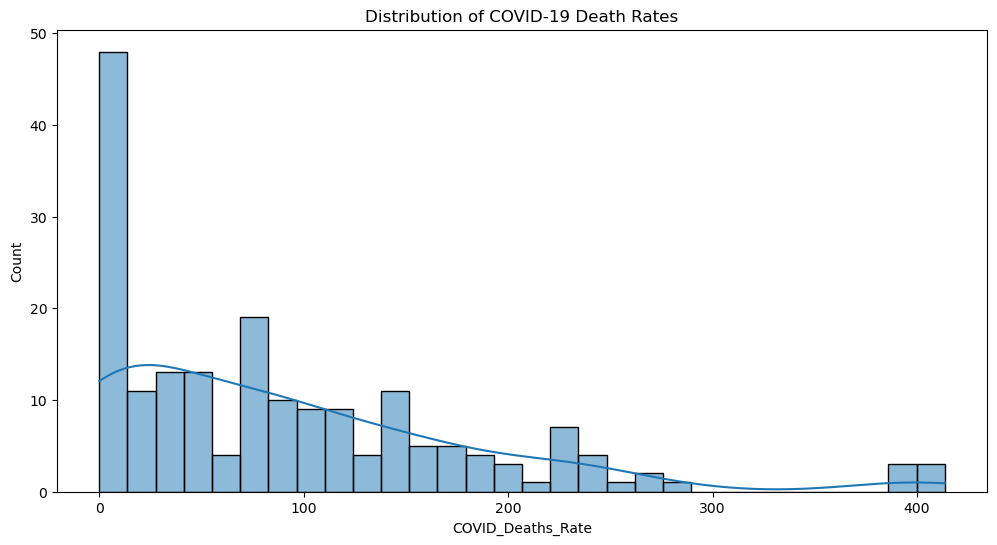

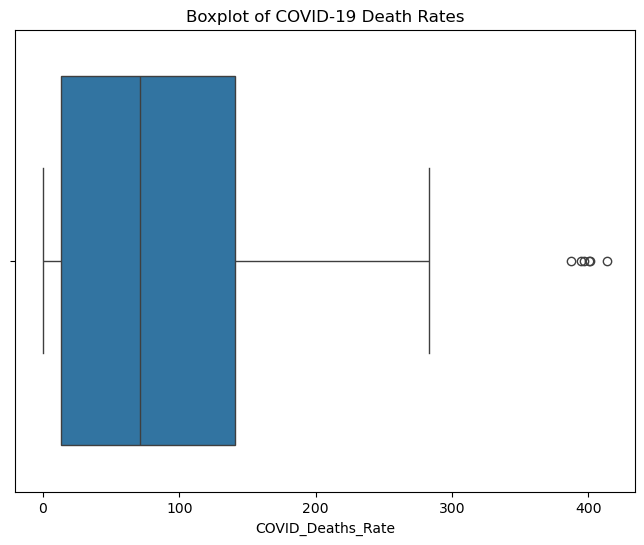

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["COVID_Deaths_Rate"], kde=True, bins=30)
plt.title("Distribution of COVID-19 Death Rates")
plt.savefig("all_figures/distribution_of_covid_19_Death_Rates", dpi=300)
plt.show()


# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=eda_covid["COVID_Deaths_Rate"])
plt.title("Boxplot of COVID-19 Death Rates")
plt.savefig("all_figures/boxplot_of_covid_19_death_rates", dpi=300)
plt.show()

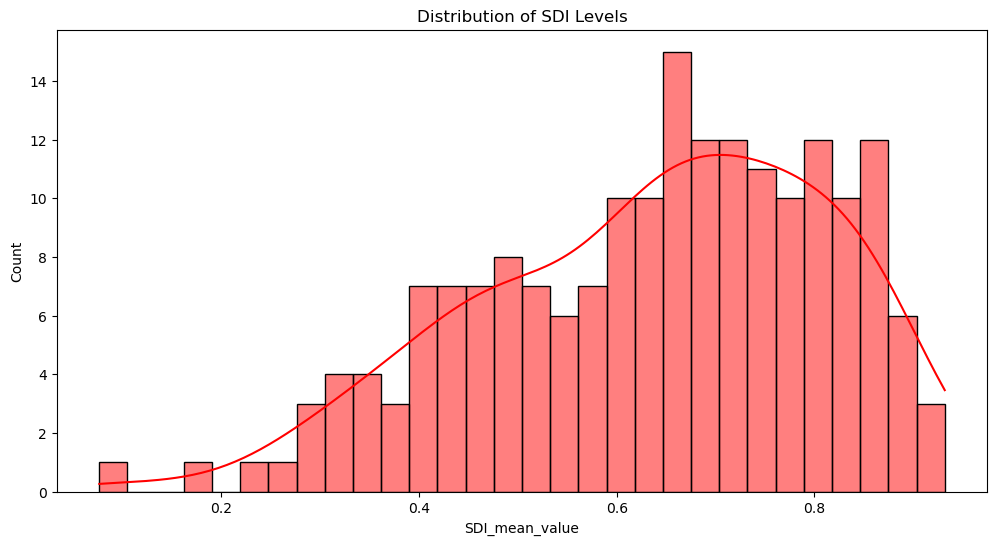

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["SDI_mean_value"], kde=True, bins=30, color="red")
plt.title("Distribution of SDI Levels")
plt.savefig("all_figures/distribution_of_sdi_levels", dpi=300)
plt.show()

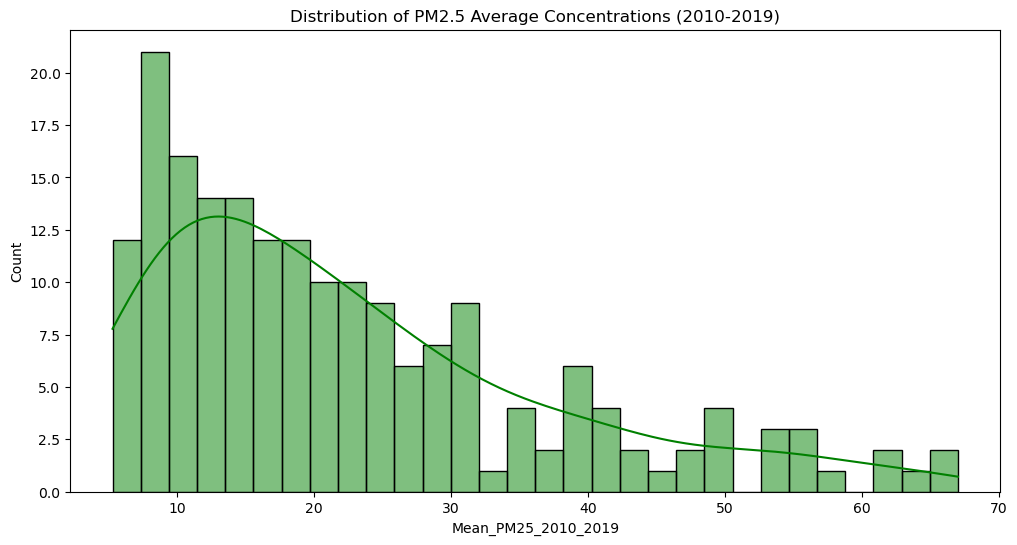

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["Mean_PM25_2010_2019"], kde=True, bins=30, color="green")
plt.title("Distribution of PM2.5 Average Concentrations (2010-2019)")
plt.savefig("all_figures/distribution_of_pm25_average_concentration", dpi=300)
plt.show()

### Scatter Plots: Bivariate Relationships

We visualize how COVID-19 death rates relate to:
- PM2.5 levels (2010–2019)
- SDI in 2020

and SDI in 2020 with the Average PM2.5 concentration

These plots will help assess the direction and strength of relationships.


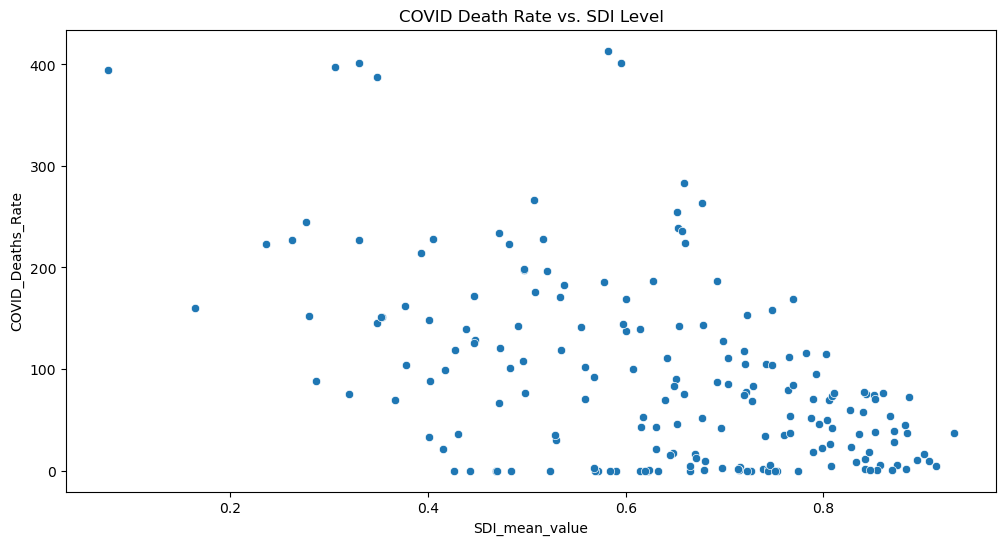

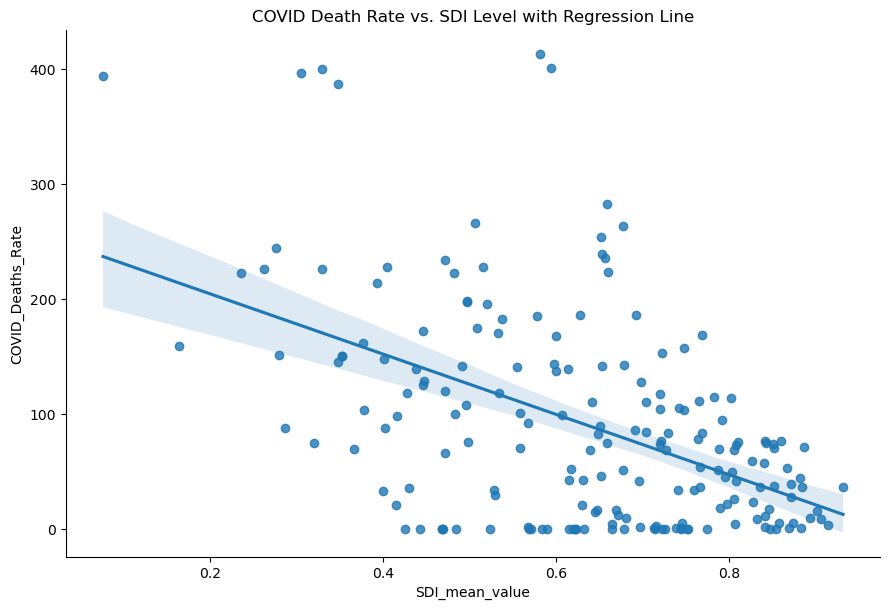

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="SDI_mean_value", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate vs. SDI Level")
plt.savefig("all_figures/scatterplot_covid_sdi", dpi=300)
plt.show()

# With regression line
sns.lmplot(
    x="SDI_mean_value", y="COVID_Deaths_Rate", data=eda_covid, height=6, aspect=1.5
)
plt.title("COVID Death Rate vs. SDI Level with Regression Line")
plt.savefig("all_figures/scatterplot_covid_sdi_with_regression", dpi=300)
plt.show()

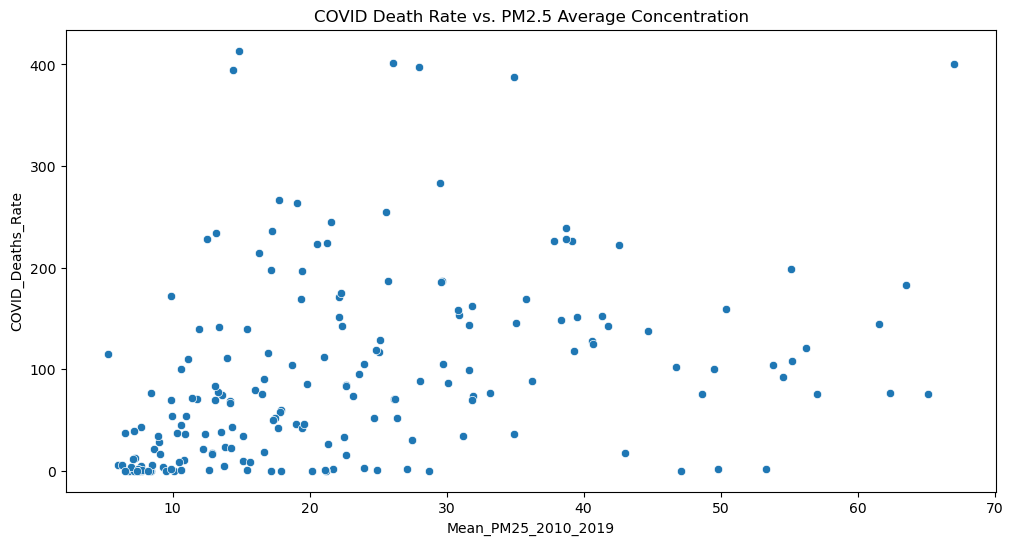

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Mean_PM25_2010_2019", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate vs. PM2.5 Average Concentration")
plt.savefig("all_figures/scatterplot_covid_pm25", dpi=300)
plt.show()

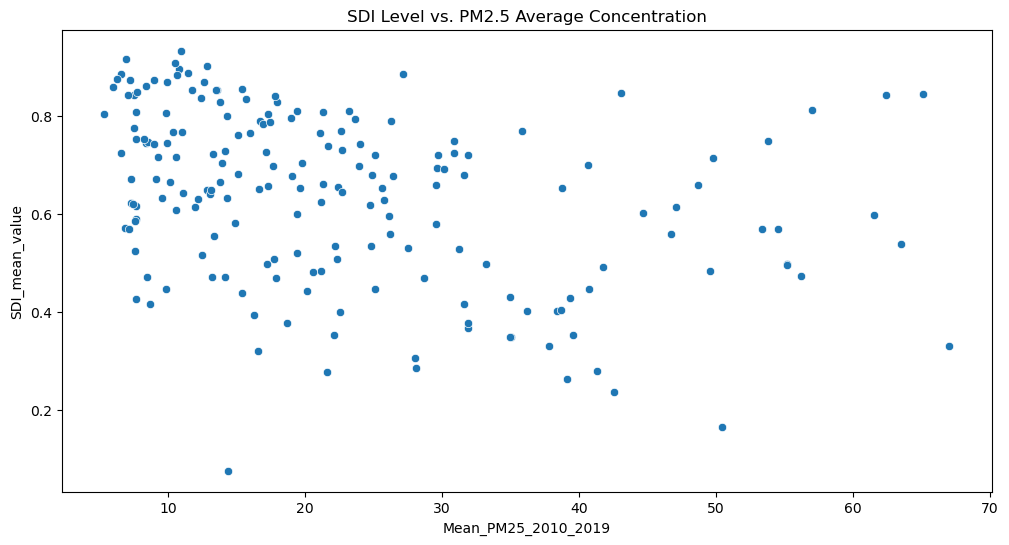

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Mean_PM25_2010_2019", y="SDI_mean_value", data=eda_covid)
plt.title("SDI Level vs. PM2.5 Average Concentration")
plt.savefig("all_figures/scatterplot_pm25_sdi", dpi=300)
plt.show()

### COVID-19 Death Rates Across SDI Categories

To further explore how socio-demographic development (SDI) relates to COVID-19 mortality, we categorized countries into four SDI levels:

- **Low**: SDI < 0.45  
- **Medium**: SDI between 0.45 and 0.60  
- **High**: SDI between 0.60 and 0.75  
- **Very High**: SDI ≥ 0.75

These groupings allow us to compare COVID-19 death rates across development levels using a boxplot. This visualization helps reveal whether certain SDI groups experienced systematically higher or lower mortality outcomes during the pandemic.

The boxplot displays the distribution of COVID-19 death rates within each SDI group, highlighting medians, spread, and potential outliers.


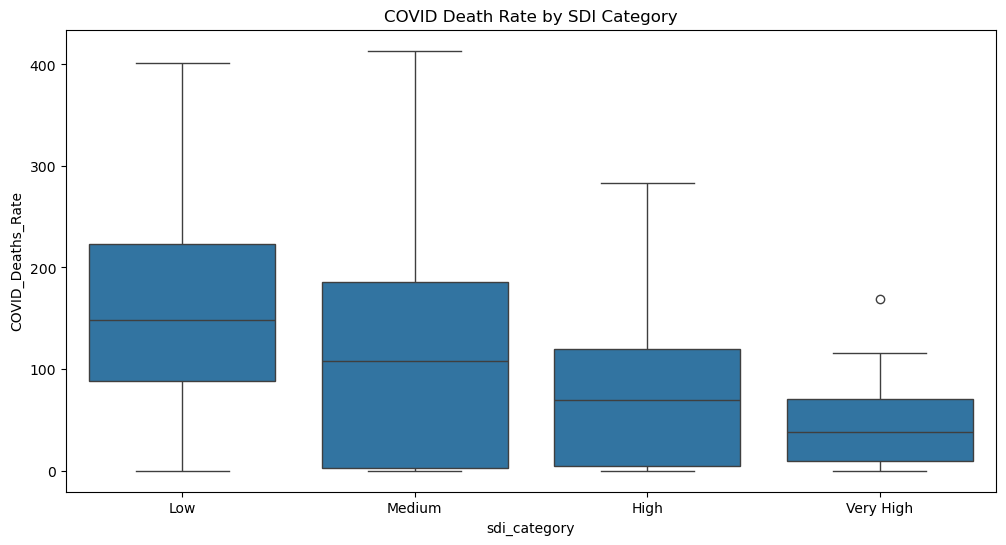

In [10]:
# Create SDI categories (adjust bins as needed)
eda_covid["sdi_category"] = pd.cut(
    eda_covid["SDI_mean_value"],
    bins=[0, 0.45, 0.60, 0.75, 1],
    labels=["Low", "Medium", "High", "Very High"],
)

# Boxplot of COVID death rate by SDI category
plt.figure(figsize=(12, 6))
sns.boxplot(x="sdi_category", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate by SDI Category")
plt.savefig("all_figures/boxplot_covid_sdi_categories", dpi=300)
plt.show()

### Correlation Analysis

Now we check how the variables relate to each other statistically using a correlation matrix. This gives us early hints on possible linear relationships.


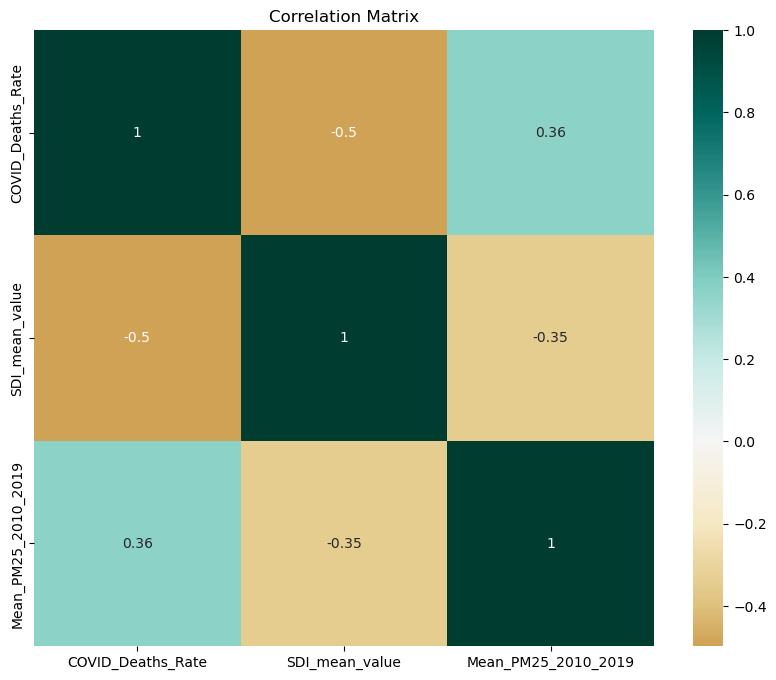

In [11]:
# Calculate correlation matrix
corr_matrix = eda_covid[
    ["COVID_Deaths_Rate", "SDI_mean_value", "Mean_PM25_2010_2019"]
].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="BrBG", center=0)
plt.title("Correlation Matrix")
plt.savefig("all_figures/correlation_matrix", dpi=300)
plt.show()

### Summary Statistics by SDI Category

To better understand how COVID-19 death rates and long-term PM₂.₅ exposure vary across development levels, we compute summary statistics (mean, std, min, max, etc.) for each SDI category. This grouped descriptive analysis helps identify whether specific SDI groups are disproportionately affected in terms of pandemic mortality or pollution exposure.


In [12]:
# Summary statistics by SDI category
print(
    eda_covid.groupby("sdi_category")[
        ["COVID_Deaths_Rate", "Mean_PM25_2010_2019"]
    ].describe()
)

C:\Users\hp\AppData\Local\Temp\ipykernel_3608\4080452303.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eda_covid.groupby("sdi_category")[


             COVID_Deaths_Rate                                        \
                         count        mean         std           min   
sdi_category                                                           
Low                       33.0  160.969940  110.094717  6.164157e-10   
Medium                    37.0  119.567072  108.410389  4.933457e-11   
High                      64.0   78.380299   78.354966  5.315239e-09   
Very High                 56.0   43.560303   36.929508  3.091067e-08   

                                                             \
                    25%         50%         75%         max   
sdi_category                                                  
Low           88.347669  148.291783  222.686235  400.853389   
Medium         2.066546  107.927319  185.812636  413.522160   
High           4.139015   69.079334  120.011723  283.368746   
Very High      9.872539   37.520659   70.842409  169.270169   

             Mean_PM25_2010_2019                     

### Top 10 Countries by COVID-19 Death Rate and PM2.5 Exposure

This section highlights the countries with the highest COVID-19 mortality rates and the highest long-term PM2.5 concentrations (2010–2019). These outliers are useful for identifying countries that may warrant deeper investigation or serve as case studies in understanding vulnerability.

- **COVID-19 Death Rate (2020):** Countries with the highest pandemic mortality.
- **PM2.5 Exposure:** Countries with the greatest long-term pollution burden.


In [13]:
# Top 10 countries by each metric
print("Top 10 countries by COVID death rate:")
print(eda_covid.nlargest(10, "COVID_Deaths_Rate")[["Country", "COVID_Deaths_Rate"]])

print("\nTop 10 countries by PM2.5 concentration:")
print(eda_covid.nlargest(10, "Mean_PM25_2010_2019")[["Country", "Mean_PM25_2010_2019"]])

Top 10 countries by COVID death rate:
                              Country  COVID_Deaths_Rate
71                           Eswatini         413.522160
116  Bolivia (Plurinational State of)         400.946884
43                        Afghanistan         400.853389
125          Central African Republic         397.160610
115                           Somalia         394.429938
162                     Guinea-Bissau         387.481711
139                              Peru         283.368746
61                            Lesotho         266.378159
51                       South Africa         263.918553
110                 Equatorial Guinea         254.559359

Top 10 countries by PM2.5 concentration:
          Country  Mean_PM25_2010_2019
43    Afghanistan               67.013
34         Kuwait               65.132
165    Tajikistan               63.496
98          Qatar               62.363
141         Egypt               61.554
177  Saudi Arabia               57.003
118      Cameroon   

### Choropleth Map: COVID-19 Death Rates by Country (2020)

This interactive choropleth map visualizes the geographic distribution of COVID-19 death rates in 2020. Hovering over each country displays its SDI value and long-term PM₂.₅ exposure. The map helps identify regional patterns or clusters of high or low mortality and allows us to explore whether such patterns align with environmental or developmental indicators.


In [14]:
import plotly.express as px

# Create the choropleth map using country names directly
fig = px.choropleth(
    eda_covid,
    locations="Country",
    locationmode="country names",
    color="lower",
    hover_name="Country",
    hover_data=["SDI_mean_value", "Mean_PM25_2010_2019"],
    color_continuous_scale=px.colors.sequential.Plasma,
    title="COVID-19 Death Rate (Lower Estimate) by Country (2020)",
    projection="natural earth",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Death Rate", thickness=20),
)


fig.show()

c:\Users\hp\anaconda3\Lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




# 📊 Summary of COVID-19 Objective EDA

### 🎯 Objective Recap:
We explored whether **long-term exposure to ambient PM₂.₅ (2010–2019)** and the **2020 Socio-Demographic Index (SDI)** are associated with **COVID-19 mortality rates** across 190 countries.

---

### 🔍 Key Findings:

1. **Moderate Correlation Between PM₂.₅ and COVID-19 Death Rate:**
   - The correlation coefficient between **long-term PM₂.₅ exposure** and **COVID-19 death rate** is **positive and moderate** (`r ≈ 0.36`).
   - This suggests a potential linear association where countries with higher pollution may experience greater COVID-19 mortality.

2. **Moderate Negative Correlation Between SDI and COVID-19 Death Rate:**
   - SDI has a **moderate negative correlation** with COVID-19 mortality (`r ≈ -0.50`).
   - This suggests that **more developed countries (higher SDI)** tend to have **lower COVID-19 death rates**, potentially reflecting stronger health systems and crisis response.

3. **Moderate Negative Correlation Between SDI and PM₂.₅:**
   - A clear inverse relationship exists between development and pollution:  
     `r ≈ -0.35` between **SDI** and **mean PM₂.₅** exposure.
   - This reflects global patterns where higher development levels often coincide with cleaner environments due to regulation and technology.

4. **Strong Trend in COVID-19 Mortality by SDI Category:**
   - Boxplots and summary statistics show a **clear decline in average COVID-19 death rate** as SDI increases:
     - **Low SDI:** ~161 deaths per 100k  
     - **Medium SDI:** ~120  
     - **High SDI:** ~78  
     - **Very High SDI:** ~44
   - Variability in death rates is highest in **low and medium SDI** categories.

5. **Consistent Decline in PM₂.₅ with Increasing SDI:**
   - Mean PM₂.₅ exposure by SDI group:
     - **Low SDI:** ~29.9 µg/m³  
     - **Medium SDI:** ~28.0  
     - **High SDI:** ~20.9  
     - **Very High SDI:** ~16.8
   - This confirms **environmental inequality**, where countries with lower development levels face higher air pollution burdens.

6. **Outliers and Country-Specific Variability:**
   - Some countries in **low and medium SDI groups** display exceptionally high death rates or pollution exposure, indicating potential for more detailed follow-up analysis.

---

### 📌 Interpretation:

At the country level, both **long-term PM₂.₅ exposure** and **socio-demographic development (SDI)** show **moderate associations** with COVID-19 death rates. However, neither variable alone fully explains the variation, highlighting the multifactorial nature of pandemic outcomes.

Further analysis is needed to uncover deeper patterns and interactions.
